In [3]:
include("Network.jl")
using Base, Distributions, Gadfly, LinearAlgebra, MLDatasets, Plots

In [4]:
# Helper function which is used to check the progress of the training.
function test_error(network::NeuralNetwork, num_samples::Int)
    total_error = 0
    for i in 1:num_samples
        rnd = floor(Int,  rand() * 9999) + 1
        test = vcat(test_x[:, :, rnd]...)
        test_label = target_vector(test_y[rnd], 10)
        out = feed_forward(test, network)
        total_error += loss(out, test_label)
    end 
    
    return total_error
end

# Maps a label (e.g. '3') to a one-hot vector which is used to calculate the loss of the network
# label: The target label
# dim: The dimension of the one-hot encoding.
function target_vector(label::Number, dim::Int)
    one_hot = zeros(dim)
    one_hot[floor(Int, label) + 1] = 1.0
    
    return one_hot
end

train_x, train_y = MNIST.traindata(Float64);
test_x,  test_y  = MNIST.testdata(Float64);

In [5]:
test_net = NeuralNetwork([Layer(784, 500), Layer(500, 500), Layer(500, 250), Layer(250, 10)]);

In [9]:
errors = []
for i in 0:8000
    if i % 200 == 0
        error = test_error(test_net, 100)
        println("Batch ", i, " Error ", error)
        push!(errors, error)
    end
    test_net = train_network(1, 75, test_net, train_x, train_y)
end

Batch 0 Error 106.2545005219157
Batch 200 Error 45.10816762648581
Batch 400 Error 44.9713229216175
Batch 600 Error 44.72964467292617
Batch 800 Error 44.581412854418986
Batch 1000 Error 44.16135151801091
Batch 1200 Error 41.469112984448195
Batch 1400 Error 36.13095688432942
Batch 1600 Error 28.019056577763205
Batch 1800 Error 28.1198572913438
Batch 2000 Error 23.598643197893306
Batch 2200 Error 24.31087804701067
Batch 2400 Error 19.07482073158097
Batch 2600 Error 18.96859336597206
Batch 2800 Error 19.11113299282155
Batch 3000 Error 13.549947950591633
Batch 3200 Error 13.201176507367748
Batch 3400 Error 12.522577993931582
Batch 3600 Error 13.68537776340748
Batch 3800 Error 15.28244639042807
Batch 4000 Error 10.971316834235363
Batch 4200 Error 10.312961868649019
Batch 4400 Error 12.27928454905146
Batch 4600 Error 8.701511781546586
Batch 4800 Error 10.937687225412763
Batch 5000 Error 8.86008723606886
Batch 5200 Error 8.833075787663425
Batch 5400 Error 10.73948120700601
Batch 5600 Error 8.6

3   3


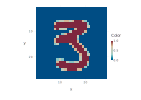

In [10]:
rnd = floor(Int,  rand() * 9999) 
test = vcat(test_x[:, :, rnd]...)
index = 0

result = soft(feed_forward(test, test_net))
mxval, mxindx = findmax(result)
println(mxindx-1, "   ", test_y[rnd])
Gadfly.spy(test_x[:, :, rnd]')

In [11]:
right = 0
wrong = 0

for i in 1:10000
    test = vcat(test_x[:, :, i]...)
    result = soft(feed_forward(test, test_net))
    mxval, mxindx = findmax(result)
    if (mxindx - 1) == test_y[i]
        right += 1
    else
        wrong += 1
    end
end

In [12]:
right / 100

90.37

In [ ]:
# 250 * 10 cycles, batch_size: 100, learning rate: 0.001
# 85.64%
right / 100